<a href="https://colab.research.google.com/github/Bryan-eng-lng/Deep-Learning-Projects-/blob/main/FruitProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification --force


Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
100% 3.58G/3.58G [00:40<00:00, 139MB/s]
100% 3.58G/3.58G [00:40<00:00, 94.7MB/s]


In [7]:
from zipfile import ZipFile

dataset = "/content/fruits-fresh-and-rotten-for-classification.zip"

with ZipFile(dataset, "r") as zip:
  zip.extractall()

print("The dataset is extracted")

The dataset is extracted


Importing Dependencies

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout  , Conv2D , MaxPooling2D , Flatten , BatchNormalization
import os
import cv2
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
filenames = os.listdir("/content/dataset/dataset/train")

print(len(filenames))



6


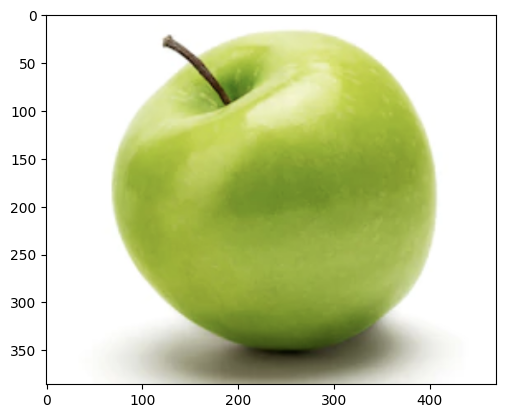

In [10]:
img = mpimg.imread("/content/dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 4.59.44 PM.png")

plt.imshow(img)
plt.show()

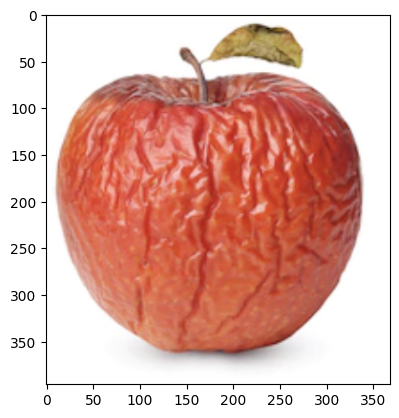

In [11]:
img2 = mpimg.imread("/content/dataset/dataset/train/rottenapples/Screen Shot 2018-06-07 at 2.15.20 PM.png")

plt.imshow(img2)
plt.show()

In [12]:
file = os.listdir("/content/dataset/dataset/train/freshapples")

print(len(file))

1693


In [13]:
file2 = os.listdir("/content/dataset/dataset/test/rottenapples")

print(len(file2))

601


We want to combine files of rotten fruits and fresh fruits in 2 files
. Fruits = Apple , Banana , Orange

In [14]:

import shutil

source_path = "/content/dataset/train"

fresh_folders = ["freshapples", "freshbanana", "freshoranges"]
rotten_folders = ["rottenapples", "rottenbanana", "rottenoranges"]


os.makedirs("fruit/fresh", exist_ok=True)
os.makedirs("fruit/rotten", exist_ok=True)


for folder in fresh_folders:
    folder_path = os.path.join(source_path, folder)
    for file in os.listdir(folder_path):
        shutil.copy(os.path.join(folder_path, file), "fruit/fresh")


for folder in rotten_folders:
    folder_path = os.path.join(source_path, folder)
    for file in os.listdir(folder_path):
        shutil.copy(os.path.join(folder_path, file), "fruit/rotten")

print("Done!")


Done!


In [15]:
rotten_file = os.listdir("/content/fruit/rotten")

print(len(rotten_file))
print(rotten_file[:5])


6161
['vertical_flip_Screen Shot 2018-06-12 at 11.43.03 PM.png', 'rotated_by_30_Screen Shot 2018-06-07 at 2.43.48 PM.png', 'Screen Shot 2018-06-12 at 11.42.45 PM.png', 'rotated_by_60_Screen Shot 2018-06-07 at 2.42.18 PM.png', 'rotated_by_30_Screen Shot 2018-06-12 at 8.57.46 PM.png']


In [16]:
fresh_file = os.listdir("/content/fruit/fresh")

print(len(fresh_file))
print(fresh_file[-5:])

4740
['Screen Shot 2018-06-08 at 5.14.48 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.10.37 PM.png', 'rotated_by_75_Screen Shot 2018-06-12 at 11.54.27 PM.png', 'rotated_by_75_Screen Shot 2018-06-08 at 5.27.06 PM.png', 'rotated_by_15_Screen Shot 2018-06-12 at 9.38.15 PM.png']


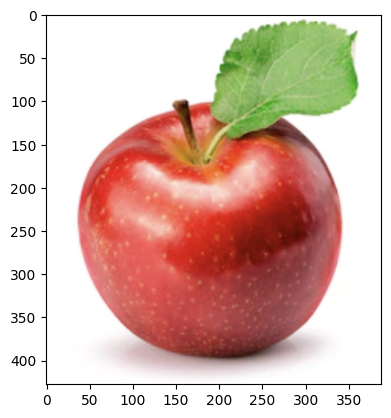

In [17]:
image = mpimg.imread("/content/fruit/fresh/Screen Shot 2018-06-08 at 5.00.12 PM.png")

plt.imshow(image)
plt.show()

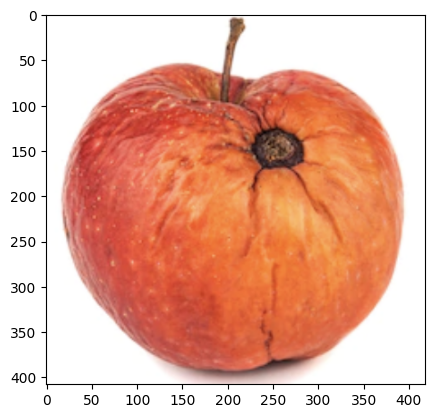

In [18]:
image2 = mpimg.imread("/content/fruit/rotten/Screen Shot 2018-06-07 at 2.22.00 PM.png")

plt.imshow(image2)

plt.show()

In [19]:
print(image2)
print(image)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 ...

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 ...

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ..

In [20]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
base_dir = "/content/fruit"
# Train Generator

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    batch_size=8,
    subset="training",
    class_mode="binary"


)

Found 8721 images belonging to 2 classes.


In [21]:
print(image2)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 ...

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


In [22]:
# Validation Generator

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    batch_size=8,
    subset="validation",
    class_mode="binary"
)

Found 2180 images belonging to 2 classes.


In [23]:
8721 + 2180

10901

In [23]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))


model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,795,649 (182.33 MB)

 Trainable params: 47,795,649 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]

)

model.fit(
    train_generator,
    epochs=5,
    steps_per_epoch = train_generator.samples // 8,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 8
)

Epoch 1/5
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 57s 50ms/step - accuracy: 0.6440 - loss: 1.0462 - val_accuracy: 0.7675 - val_loss: 0.5478
Epoch 2/5
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5000 - loss: 0.5533 - val_accuracy: 0.7707 - val_loss: 0.5393
Epoch 3/5
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 53s 49ms/step - accuracy: 0.8742 - loss: 0.2995 - val_accuracy: 0.8759 - val_loss: 0.3077
Epoch 4/5
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8750 - loss: 0.3286 - val_accuracy: 0.8791 - val_loss: 0.3077
Epoch 5/5
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9117 - loss: 0.2343

Lets Use Pretrained Model MObileNetV2 ..

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    "/content/fruit",
    target_size=(224,224),
    batch_size=8,
    class_mode="binary",
    subset="training"
)

val_gen = train_datagen.flow_from_directory(
    "/content/fruit",
    target_size=(224,224),
    batch_size=8,
    class_mode="binary",
    subset="validation"
)

num_classes = train_gen.num_classes


base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

model = Sequential([
    base_model,
    MaxPooling2D(),
    Flatten(), # Added Flatten layer
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dense(1,activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen
)

base_model.trainable=True

Found 8721 images belonging to 2 classes.
Found 2180 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 199s 167ms/step - accuracy: 0.8987 - loss: 0.2743 - val_accuracy: 0.9720 - val_loss: 0.0749
Epoch 2/5
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 158s 145ms/step - accuracy: 0.9628 - loss: 0.1015 - val_accuracy: 0.9803 - val_loss: 0.0513
Epoch 3/5
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 158s 145ms/step - accuracy: 0.9739 - loss: 0.0715 - val_accuracy: 0.9807 - val_loss: 0.0451
Epoch 4/5
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 157s 144ms/step - accuracy: 0.9809 - loss: 0.0530 - val_accuracy: 0.9913 - val_loss: 0.0235
Epoch 5/5
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 159s 146ms/step - accuracy: 0.9777 - loss: 0.0591 - val_accuracy: 0.9858 - val_loss: 0.0315


In [26]:
model.evaluate(val_gen)

273/273 ━━━━━━━━━━━━━━━━━━━━ 34s 125ms/step - accuracy: 0.9820 - loss: 0.0423


[0.03484811633825302, 0.9853211045265198]

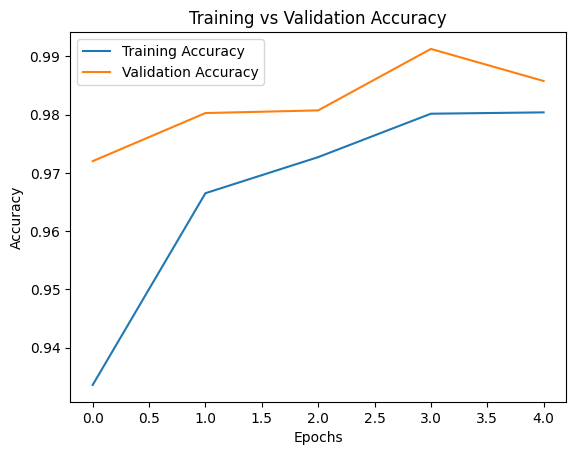

In [27]:



acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()
